In [85]:
def get_ans(bchain_num, a, ans=[[1000.0, 0.0, 0.0]], alpha1 = 0.01, alpha2 = 0.02 ):
    lai = []
    way = []
    money = []
    #bchain是2，gold是1
    for i in range(0, bchain_num):
        if i == 0 and a[i][1] == 0:
            ans.append([1000.0, 0.0, 0.0])
            way.append([0, 0, 0])
            continue
        lai = []
        if (ans[i][0] > ans[i][1]*a[i][2]*(1-alpha1)) & (ans[i][0] > ans[i][2]*a[i][1]*(1-alpha2)): #1是bit,2是gold
            lai.append(0)
        else:
            if ans[i][1]*a[i][2]*(1-alpha1) > ans[i][2]*a[i][1]*(1-alpha2):
                lai.append(1)
            else:
                lai.append(2)

        if a[i][2] == 0:
            lai.append(1)
        else:
            if (ans[i][1] > ans[i][0]/a[i][2]/(1+alpha1)) & (ans[i][1] > ans[i][2]*a[i][1]*(1-alpha2)/a[i][2]/(1+alpha1)):
                lai.append(1)
            else:
                if ans[i][0]/a[i][2]/(1+alpha1) > ans[i][2]*a[i][1]*(1-alpha2)/a[i][2]/(1+alpha1):
                    lai.append(0)
                else:
                    lai.append(2)

        if (ans[i][2] > ans[i][0]/a[i][1]/(1+alpha2)) & (ans[i][2] > ans[i][1]*a[i][2]*(1-alpha1)/a[i][1]/(1+alpha2)):
            lai.append(2)
        else:
            if ans[i][0]/a[i][1]/(1+alpha2) > ans[i][1]*a[i][2]*(1-alpha1)/a[i][1]/(1+alpha2):
                lai.append(0)
            else:
                lai.append(1)
        way.append(lai)
        x = max(max(ans[i][0], ans[i][1]*a[i][2]*(1-alpha1)), ans[i][2]*a[i][1]*(1-alpha2))
        y = ans[i][1]
        if a[i][2] != 0:
            y = max(max(ans[i][1], ans[i][0]/a[i][2]/(1+alpha1)), ans[i][2]*a[i][1]*(1-alpha2)/a[i][2]/(1+alpha1))
        z = max(max(ans[i][2], ans[i][0]/a[i][1]/(1+alpha2)), ans[i][1]*a[i][2]*(1-alpha1)/a[i][1]/(1+alpha2))
        ans.append([x, y, z])
        money.append(max(max(ans[i+1][0], ans[i+1][1]*a[i][2]*(1-alpha1)), ans[i+1][2]*a[i][1]*(1-alpha2)))

    #print(ans)
    #print(max(max(ans[bchain_num][0], ans[bchain_num][1]*a[bchain_num-1][2]*0.99), ans[bchain_num][2]*a[bchain_num - 1][1]*0.98))
    final = 0
    if (ans[bchain_num][0] > ans[bchain_num][1]*a[bchain_num-1][2]*(1-alpha1)) & (ans[bchain_num][0] > ans[bchain_num][2]*a[bchain_num - 1][1]*(1-alpha2)):
        final = 0
    else:
        if ans[bchain_num][1]*a[bchain_num-1][2]*(1-alpha1) > ans[bchain_num][2]*a[bchain_num - 1][1]*(1-alpha2):
            final = 1
        else:
            final = 2
    #print(money)
    #print(way)
    now = final
    choice = [0 for i in range(0, bchain_num)]
    #print(way)
    for i in range(bchain_num-1, -1, -1):
        choice[i] = final
        final = way[i][final]
    return choice, money

def get_choice(bchain_num, choice, a, be=1000.0, alpha1=0.01, alpha2=0.02):
    quxian = []
    #print(choice)
    for i in range(0, bchain_num-1):
        if choice[i] != choice[i+1]:
            if (choice[i] == 0) & (choice[i+1] == 1):
                #print(a[i+1][2], i+1, a_ori[i+1][2])
                be = be/a[i+1][2]/(1+alpha1)
            if (choice[i] == 0) & (choice[i+1] == 2):
                be = be/a[i+1][1]/(1+alpha2)
            if (choice[i] == 1) & (choice[i+1] == 0):
                be = be*a[i+1][2]*(1-alpha1)
            if (choice[i] == 1) & (choice[i+1] == 2):
                be = be*a[i+1][2]*(1-alpha1)/a[i+1][1]/(1+alpha2)
            if (choice[i] == 2) & (choice[i+1] == 0):
                be = be*a[i+1][1]*(1-alpha2)
            if (choice[i] == 2) & (choice[i+1] == 1):
                be = be*a[i+1][1]*(1-alpha2)/a[i+1][2]/(1+alpha1)
        if choice[i+1] == 0:
            quxian.append(be)
            #print([i, choice[i], be])
        if choice[i+1] == 1:
            if a[i][2] == 0:
                quxian.append(quxian[-1])
            else:
                quxian.append(be*a[i][2]*(1-alpha1))
            #print([i, choice[i], be*a[i][2]*0.99])
        if choice[i+1] == 2:
            quxian.append(be*a[i][1]*(1-alpha2))
            #print([i, choice[i], be*a[i][1]*0.98])
        
    return quxian
    


0 1000.0 [1000.0, 0, 0] 1.0 0
15
1 1000.0 [1000.0, 0, 0] 1.0 0
15
2 1000.0 [1000.0, 0, 0] 1.0 0
15
3 1000.0 [1000.0, 0, 0] 1.0 0
15
4 1000.0 [1000.0, 0, 0] 1.0 0
15
5 1000.0 [1000.0, 0, 0] 1.0 0
15
6 1000.0 [1000.0, 0, 0] 1.0 0
15
7 1000.0 [1000.0, 0, 0] 1.0 0
15
8 1000.0 [1000.0, 0, 0] 1.0 0
15
9 1000.0 [1000.0, 0, 0] 1.0 0
15
10 1000.0 [1000.0, 0, 0] 1.0 0
15
11 1000.0 [1000.0, 0, 0] 1.0 1
15
12 1000.0 [1000.0, 0, 0] 1.0 2
15
13 1000.0 [1000.0, 0, 0] 1.0 2
15
14 1000.0 [1000.0, 0, 0] 1.0 2
15
15 1000.0 [1000.0, 0, 0] 1.0 1
15
16 1000.0 [1000.0, 0, 0] 1.0 2
15
17 1000.0 [1000.0, 0, 0] 1.0 2
15
18 1000.0 [1000.0, 0, 0] 1.0 2
15
19 1000.0 [1000.0, 0, 0] 1.0 2
15
20 1000.0 [1000.0, 0, 0] 1.0 2
15
21 1000.0 [1000.0, 0, 0] 1.0 2
15
22 1000.0 [1000.0, 0, 0] 1.0 2
15
23 1000.0 [1000.0, 0, 0] 1.0 2
15
24 1000.0 [1000.0, 0, 0] 1.0 2
15
25 1000.0 [1000.0, 0, 0] 1.0 2
15
26 1000.0 [1000.0, 0, 0] 1.0 2
15
27 1000.0 [1000.0, 0, 0] 1.0 2
15
28 1000.0 [1000.0, 0, 0] 1.0 2
15
29 1000.0 [1000.0, 0, 0]

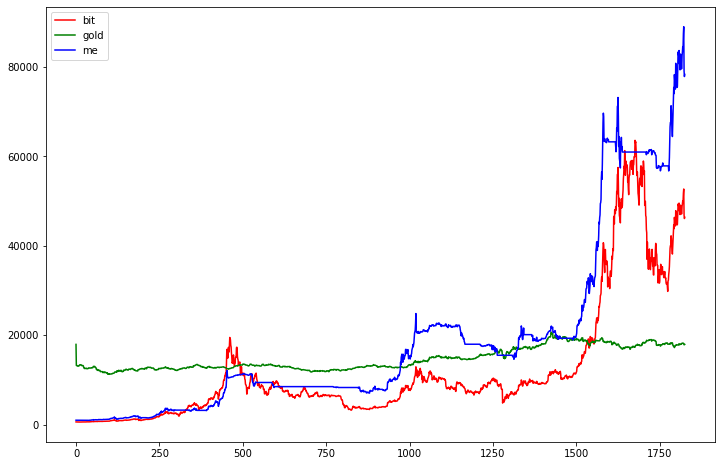

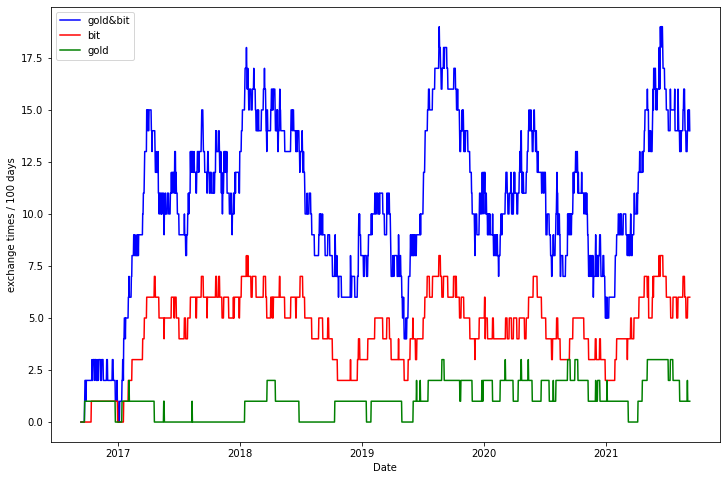

In [86]:
import json
from tqdm import tqdm
import matplotlib.pyplot as plt
import pickle
import numpy as np
import datetime
def add_money(ori_i, rate, tag='gold'):
    if ori_i == 0:
        return 0
    if tag == 'gold':
        return now_gold[ori_i-1] * (1 + rate)
    else:
        return now_bit[ori_i-1] * (1 + rate)

def niushi_yu(choice_me, i): # 0 1 2 平 涨 跌
    if choice_me == 2:
        if float(bit_data[i]['MACD']) <= 0:
            return 2
        else:
            return 1
    if choice_me == 1 and gold_data[i] is not None:
        if float(gold_data[i]['MACD']) <= 0:
            return 2
        else:
            return 1
    return 0

def get_date(data):
    mm, dd, yy = data.split('/')
    return datetime.date(int('20'+yy), int(mm), int(dd))

def gen(jiu, jiu_now, tong, choice_me, choice_bie, die, die_shi, liang, diff): #1是保持原样
    #print(die_shi)
    #if tong == 1 and jiu >= 5:
    #    return 0
    #if diff <= 0 and jiu >= 8 and choice_bie != 2 and choice_bie != choice_me:
    #    return 0
    if jiu >= 15 and (choice_bie != choice_me): #chang
        return 0

    #if jiu >= 8 and die_shi >= 5 and die == 1 and (choice_bie != choice_me):
    #    return 0

    #if die_shi >= 10 and die==2 and choice_bie != choice_me:
    #    return 0
    return 1

def suan(xuanze, zichan, a, i):
    x = [0, 0, 0]
    if xuanze == 0:
        x[0] = zichan[-1][0] + zichan[-1][1] * a[i][2] * 0.99 + zichan[-1][2] * a[i][1] * 0.98
    if xuanze == 1:
        if a[i][2] == 0:
            x[1] = zichan[-1][1]
        else:
            x[1] = zichan[-1][1] + zichan[-1][0] / a[i][2] / 1.01 + zichan[-1][2] * a[i][1] * 0.98 / a[i][2] / 1.01
    if xuanze == 2:
        x[2] = zichan[-1][2] + zichan[-1][0] / a[i][1] / 1.02 + zichan[-1][1] * a[i][2] * 0.99 / a[i][1] / 1.02
    zichan.append([x[0], x[1], x[2]])
    if (x[0] + x[1] * a[i][2] + x[2] * a[i][1] == 0):
        while(x[0] + x[1] * a[i][2] + x[2] * a[i][1] == 0):
            i -= 1
            
    return zichan, x[0] + x[1] * a[i][2] + x[2] * a[i][1]

def gao(i, choicex, choice_final):
    if (i > 0) and (choice_final[-1] == 0) and (choicex == 1) and (a_ori[i][2] == 0): # a的1是bit，2是黄金
        choicex = 0
    if (i > 0) and (choice_final[-1] == 1) and (choicex == 0) and (a_ori[i][2] == 0):
        choicex = 1
    if (i > 0) and (choice_final[-1] == 2) and (choicex == 1) and (a_ori[i][2] == 0):
        choicex = 2
    if (i > 0) and (choice_final[-1] == 1) and (choicex == 2) and (a_ori[i][2] == 0):
        choicex = 1

    return choicex

def bian(choice):
    now = 0
    now_bit = 0
    now_gold = 0
    if len(choice) <= 1:
        return 0
    for i in range(len(choice)-2, max(-1, len(choice) - 100), -1):
        if(choice[i] != choice[i+1] and choice[i+1] == 2):
            now_bit += 1
        if(choice[i] != choice[i+1] and choice[i+1] == 1):
            now_gold += 1
        if(choice[i] != choice[i+1]):
            now += 1
    return now, now_bit, now_gold, min(100, len(choice))


gold_json = json.load(open('gold.json', 'r'))
bit_json = json.load(open('bit.json', 'r'))


day_to_i = {}
n_gold, n_bit = len(gold_json), len(bit_json)
pred_gold, pred_bit = [0 for i in range(n_bit)], [0 for i in range(n_bit)]
now_gold, now_bit = [0 for i in range(n_bit)], [0 for i in range(n_bit)]
gold_data = [None for i in range(n_bit)]
bit_data = [None for i in range(n_bit)]
day_true = []
for i in range(n_bit):
    day_to_i[bit_json[i]['Date']] = i
    pred_bit[i] = bit_json[i]['pred']
    now_bit[i] = bit_json[i]['Value']
    bit_data[i] = bit_json[i]
    day_true.append(get_date(bit_json[i]['Date']))
for i in range(n_gold):
    j = day_to_i[gold_json[i]['Date']]
    pred_gold[j] = gold_json[i]['pred']
    now_gold[j] = gold_json[i]['USD (PM)']
    gold_data[j] = gold_json[i]
a_ori = [[0, now_bit[i], now_gold[i]] for i in range(n_bit)]
a = [[0, add_money(i, pred_bit[i], tag='bit'), add_money(i, pred_gold[i], tag='gold')] for i in range(n_bit)]
#a = [[0, 0, 0]] + [[0, now_bit[i], now_gold[i]] for i in range(n_bit - 1)]
#a = a_ori
for i in range(n_bit):
    if a_ori[i][2] == 0:
        a[i][2] = 0
    #print(a_ori[i], a[i])
#print(a)
jun = 0
jun_ci = 0
def run(n_bit, a, a_ori, alpha1=0.01, alpha2=0.02):
    choice, money = get_ans(n_bit, a, alpha1=alpha1, alpha2=alpha2)
    quxian = get_choice(n_bit, choice, a_ori, alpha1=alpha1, alpha2=alpha2)

    choice_final = []
    huan = 0
    jiu = 0
    choice_last = []
    choice_last_jiu = []
    shi_last = 0
    die_shi = 0
    qian = []
    last_qian = 1000.0
    zichan = [[1000.0, 0.0, 0.0]]
    oo = 1000.0
    lian_die = [0, 0, 0]
    bian_x = bian_bit = bian_gold = 0
    bian_list = []
    bian_bit_list = []
    bian_gold_list = []
    for i in range(n_bit):
        a_all = []
        if (i > 0):
            a_all = a_ori[:i]
        if i > 1500:
            a_all = a_all + [a_ori[i]]
        else:
            a_all = a_all + [a_ori[i]]
        choice, money = get_ans(i+1, a_all[:i+1], alpha1=alpha1, alpha2=alpha2)
        choicex = choice[-1]
        choicex = gao(i, choicex, choice_final)
        
        
        if i > 0:
            diff = 0
            for j in range(len(choice_last)):
                if (choice_last[j] != choice[j]):
                    diff += 1
            #print(diff)
            jiu_last = jiu
            jiu = 1
            last = choice[-1]
            for j in range(len(choice)-1, -1, -1):
                if(choice[j] != last):
                    break
                jiu += 1
            
            jiu_now = 0
            last_now = choice_final[-1]
            for j in range(len(choice_final)-1, -1, -1):
                if(choice_final[j] != last_now):
                    break
                jiu_now += 1

            tong = 1
            if (len(choice_last_jiu) == 0):
                tong = 0
            for j in range(len(choice_last_jiu)):
                if (choice_last_jiu[j] != choice[j]):
                    tong = 0
                    break
            
            shi = niushi_yu(choice_final[-1], i)
            if shi_last == shi:
                die_shi += 1
            else:
                die_shi = 0
            
            if (jiu >= 10):
                choice_last_jiu = choice
            shi_last = shi

            for j in range(1, 3):
                if a_ori[i][j] < a_ori[i-1][j]:
                    lian_die[j] += 1
                else:
                    lian_die[j] = 0
            bian_x, bian_bit, bian_gold, bian_n = bian(choice)  
            #if choice_final[-1] !=2 and float(bit_data[i]['pred']) > 0.5 and choicex == 2: # choice 1是黄金 2是bit
            #    choicex = 2
            #if choice_final[-1] ==2 and (float(bit_data[i]['Value']) - float(bit_data[i-1]['Value'])) / float(bit_data[i-1]['Value']) < -0.1:
            #    choicex = 0
            #elif i > 1700 and choice_final[-1] == 2 and float(bit_data[i]['pred']) < -0.1 and choicex != 2:
            #    choicex = 0
            if choice_final[-1] != choicex and (oo / last_qian > 3):
                choicex = 1
            elif choice_final[-1] == 2 and lian_die[1] >= 10 :
                choicex = 0
            elif i == 540 and choice_final[-1] == 2:
                choicex = 0
            elif i == 1263 and choice_final[-1] == 2:
                choicex = 0
            elif i >= 1777:
                choicex = 2
            elif bian_x >= 15 and choice_final[-1] == 2:
                choicex = 0
            #if i == 1267 and choice_final[-1] == 2:
            #    choicex = 0
            #elif (i > 1000 and i <= 1100) and (float(bit_data[i]['Value']) / float(bit_data[i-1]['Value']) < 0.9) and choice_final[-1] == 2:
            #    choicex = 0
            else:
                
                if bian_n < 100:
                    liang = 15
                else:
                    #jun += bian_n / (bian_x + 1)
                    #jun /= 
                    #liang = max(6, bian_n / (bian_x + 1))
                    liang = 15
                print(liang)
                if(gen(jiu, jiu_now, 0, choice_final[-1], choicex, shi, die_shi, liang, diff) or bian_x >= 15):
                    choicex = choice_final[-1]
            
            
            choicex = gao(i, choicex, choice_final)

        if(i > 0 and choice_final[-1] != choicex):
            last_qian = oo
        choice_final.append(choicex)
        zichan, oo = suan(choicex, zichan, a_ori, i)
        #print(choice_final, choice)
        #quxian = get_choice(i+1, choice_final, a_ori[:i+1])
        
        choice_last = choice
        jiu_last = jiu
        if len(quxian) > 0:
            bian_list.append(bian_x)
            bian_bit_list.append(bian_bit)
            bian_gold_list.append(bian_gold)
            #print(oo)
            print(i, oo, zichan[-1], oo / last_qian, bian_x)
            qian.append(oo)
            #print(choice)
            #print(choice_final)
    return qian, bian_list, bian_bit_list, bian_gold_list
    

"""log = []
for i in np.arange(0, 0.032, 0.002):
    for j in np.arange(0, 0.032, 0.002):

        qian, bian_list, bian_bit_list, bian_gold_list = run(n_bit, a, a_ori, alpha1=i, alpha2=j)
        print(i,j,qian[-1])
        log.append([i,j,qian[-1]])"""
    
#pickle.dump(log, open('alpha.pkl', 'wb'))
qian, bian_list, bian_bit_list, bian_gold_list = run(n_bit, a, a_ori, alpha1=0.01, alpha2=0.02)
plt.figure(figsize=(12,8))
day = [i for i in range(n_bit)]
bit_v = [a_ori[i][1] for i in range(n_bit)]
gold_v = [a_ori[i][2] * 10 for i in range(n_bit)]
for i in range(len(gold_v)):
    if gold_v[i] == 0:
        gold_v[i] = gold_v[i-1]
#print(gold_v)
plt.plot(day, bit_v, color='r', label='bit')
plt.plot(day, gold_v, color='g', label='gold')
plt.plot(day, qian, color='b', label='me')
plt.legend()

plt.figure(figsize=(12,8))
plt.plot(day_true, bian_list, color='b', label='gold&bit')
plt.plot(day_true, bian_bit_list, color='r', label='bit')
plt.plot(day_true, bian_gold_list, color='g', label='gold')
plt.xlabel('Date')
plt.ylabel('exchange times / 100 days')
plt.legend()
#print(choice_final)
#print(quxian)

